<a href="https://colab.research.google.com/github/Samipthi/Model-for-Brain-Tumour-Detection/blob/main/brain_tumor_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#connection to the kaggle api
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [ ]:
! mkdir ~/.kaggle

# make a directory named kaggle and copy the kaggle.json file there
!cp kaggle.json ~/.kaggle/

# change the permissions of the file
! chmod 600 ~/.kaggle/kaggle.json

# download the dataset for a specific competition
! kaggle datasets download -d abhranta/brain-tumor-detection-mri

 92% 59.0M/64.3M [00:03<00:00, 19.9MB/s]
100% 64.3M/64.3M [00:03<00:00, 21.1MB/s]


In [ ]:
#To extract all the data from the zip file
from zipfile import ZipFile
file_name = "/content/brain-tumor-detection-mri.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])
# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [ ]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'../content/Brain_Tumor_Detection/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"../content/Brain_Tumor_Detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
#total no. of images present in the directory
data = np.array(data)
data.shape

(2891, 128, 128, 3)

In [ ]:
#
result = np.array(result)
result = result.reshape(2891,2)

In [ ]:
# Split data into train and test set
#20% data is included in the test set
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
#
model = Sequential()

#First convolution layer
model.add(Conv2D(32, kernel_size=(2, 2), activation ='relu',input_shape=(128, 128, 3), padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Sceond convolution layer
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#Thrid convolution layer
model.add(Conv2D(128, kernel_size=(2, 2),  activation ='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#fourth convolution layer
model.add(Conv2D(256, kernel_size = (2,2), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#fifth convolution layer
model.add(Conv2D(512, kernel_size=(2, 2),  activation ='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#sixth convolution layer
model.add(Conv2D(1024, kernel_size = (2,2), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

METRICS = [
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]

model.compile(loss = "categorical_crossentropy", optimizer='Adamax', metrics = METRICS)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 128)      0

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='loss', patience=10)

history = model.fit(x_train, y_train, epochs=100, batch_size=40, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/100
58/58 [==============================] - 15s 44ms/step - loss: 0.9370 - accuracy: 0.5670 - precision: 0.5670 - recall: 0.5670 - val_loss: 0.6247 - val_accuracy: 0.5993 - val_precision: 0.5993 - val_recall: 0.5993
Epoch 2/100
58/58 [==============================] - 2s 26ms/step - loss: 0.5867 - accuracy: 0.7016 - precision: 0.7016 - recall: 0.7016 - val_loss: 0.5015 - val_accuracy: 0.7565 - val_precision: 0.7565 - val_recall: 0.7565
Epoch 3/100
58/58 [==============================] - 2s 28ms/step - loss: 0.5418 - accuracy: 0.7401 - precision: 0.7401 - recall: 0.7401 - val_loss: 0.4980 - val_accuracy: 0.7478 - val_precision: 0.7478 - val_recall: 0.7478
Epoch 4/100
58/58 [==============================] - 2s 28ms/step - loss: 0.4871 - accuracy: 0.7785 - precision: 0.7785 - recall: 0.7785 - val_loss: 0.4225 - val_accuracy: 0.8152 - val_precision: 0.8152 - val_recall: 0.8152
Epoch 5/100
58/58 [==============================] - 2s 28ms/step - loss: 0.4043 - accuracy: 0.8317 - p

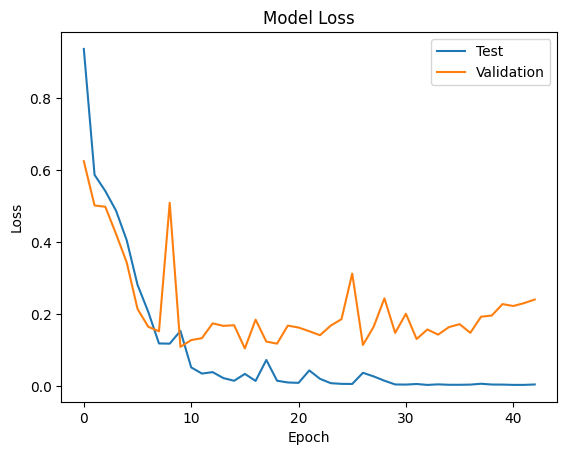

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

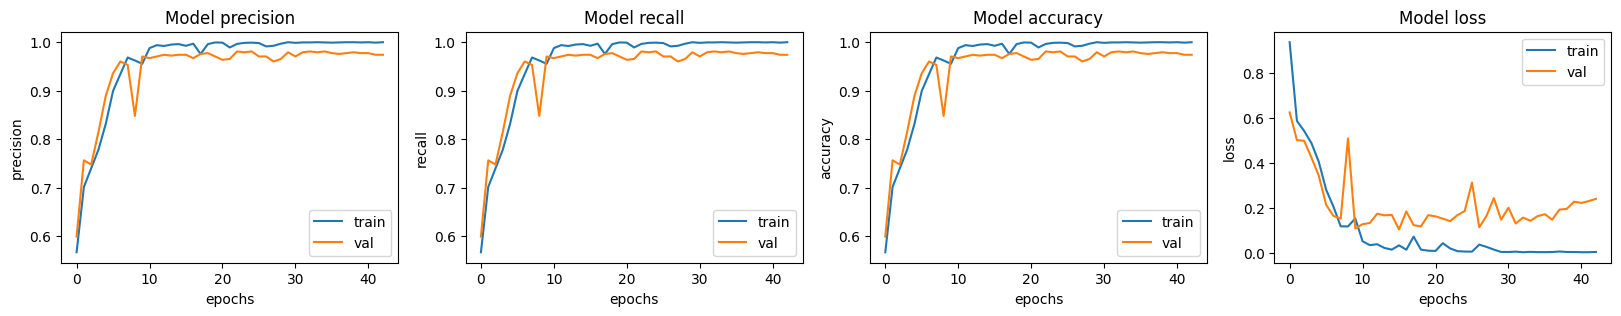

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:

# Save the trained model to a file
model.save('our_trained_model.h5')



19/19 [==============================] - 0s 21ms/step - loss: 0.2399 - accuracy: 0.9741 - precision: 0.9741 - recall: 0.9741
Test loss: 0.23993085324764252
Test accuracy: 0.9740932583808899
19/19 [==============================] - 0s 5ms/step
[[1.0000000e+00 1.5624156e-20]
 [1.1078864e-17 1.0000000e+00]
 [7.9966033e-24 1.0000000e+00]
 [1.0000000e+00 2.2416647e-11]
 [1.0000000e+00 8.7666446e-18]
 [1.0000000e+00 1.3182239e-11]
 [1.0000000e+00 5.8109645e-15]
 [4.4436167e-11 1.0000000e+00]
 [3.9806558e-08 1.0000000e+00]
 [1.0000000e+00 3.4285384e-11]]


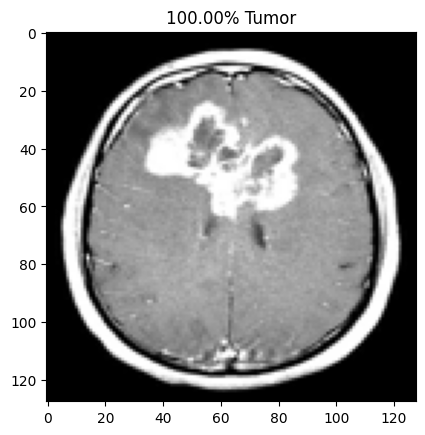

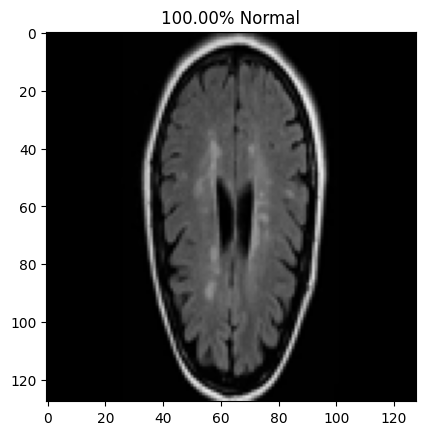

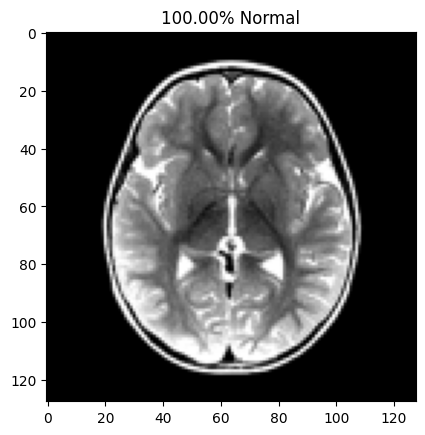

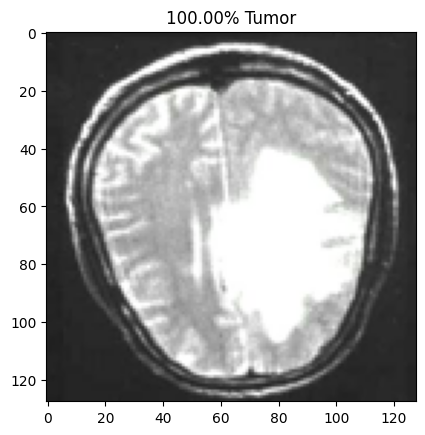

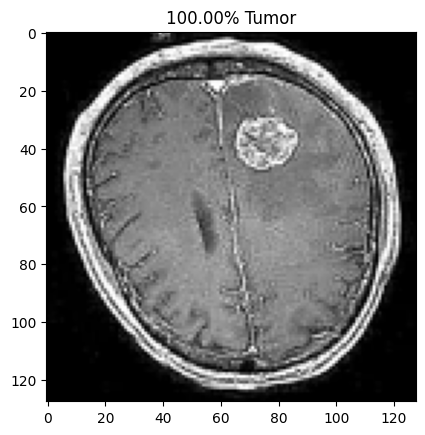

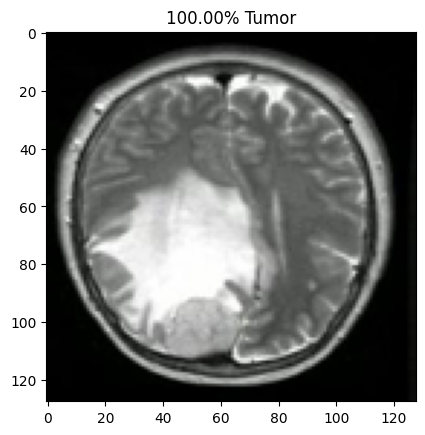

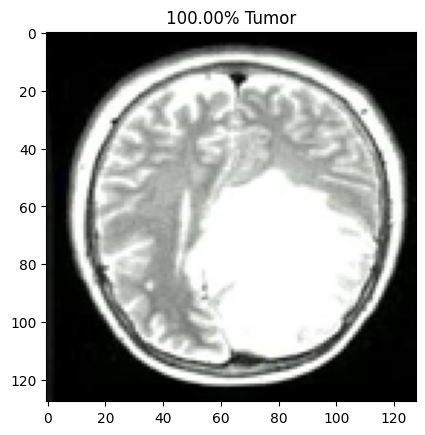

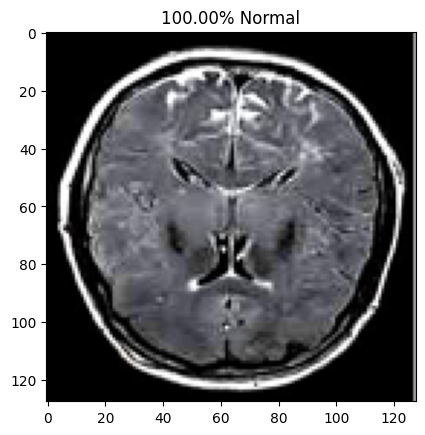

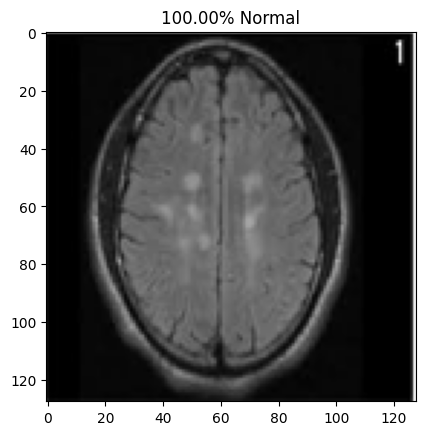

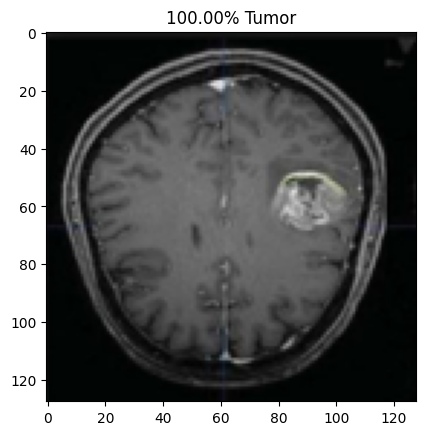

Precision: 0.96
Recall: 0.99
F1 Score: 0.97


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

test_results = model.evaluate(x_test, y_test)
test_loss = test_results[0]
test_acc = test_results[1]



print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


# Make predictions on the test set
y_pred = model.predict(x_test)
print(y_pred[:10])
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% Normal')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% Tumor')
  plt.imshow(x_test[index])
  plt.show()


# Convert predictions from one-hot encoding to label encoding
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)

# Print evaluation metrics
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))



In [ ]:
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

Confusion Matrix with Normalized Values


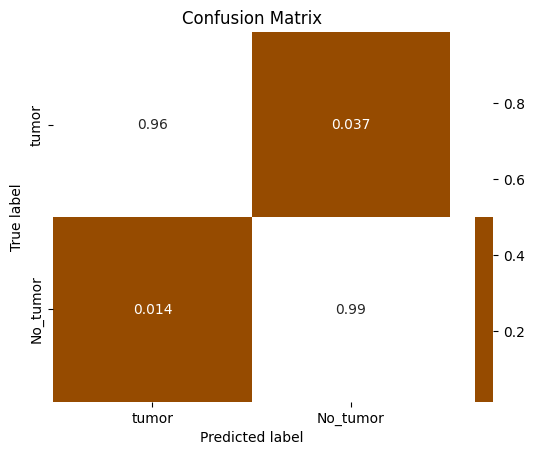

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.colors as mcolors
def plot_confusion_matrix(normalize):
  classes = ['tumor','No_tumor']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  cmap = mcolors.ListedColormap(['#964B00', 'white'])
  sns.heatmap(cn,cmap=cmap,annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# classes = ['tumor','No_tumor']
# y_pred = model.predict(x_test)
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_true = np.argmax(y_test, axis=1)
# tick_marks = [0.5,1.5]
# plt.xticks(tick_marks, classes)
# plt.yticks(tick_marks, classes)
# plt.title('Confusion Matrix')
# cm = confusion_matrix(y_true, y_pred_classes)

# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the labels of the test set


# Convert the predictions to binary labels
y_pred = np.argmax(y_pred, axis=1)

# Convert the test labels to binary labels
y_true = np.argmax(y_test, axis=1)

# Calculate and print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred))

# Calculate and print the classification report
print('Classification Report:')
print(classification_report(y_true, y_pred))


In [ ]:
#it classification of prediction folder

prediction_path = "../content/Brain_Tumor_Detection/pred"

prediction_filenames = []

import cv2

prediction_data = []
img_size = 128

for img_path in os.listdir(prediction_path):
    if img_path.endswith(".jpg") or img_path.endswith(".jpeg") or img_path.endswith(".png"):
        img = cv2.imread(os.path.join(prediction_path, img_path))
        img = cv2.resize(img, (img_size, img_size))
        prediction_data.append(img)
        prediction_filenames.append(img_path)  # add this line to populate the prediction_filenames list

prediction_data = np.array(prediction_data)



import os
print(os.listdir(prediction_path))
data = np.array(prediction_data)
print(data.shape)
predictions = model.predict(prediction_data)
def names(label):
    if label == 0:
        return 'No Tumor'
    else:
        return 'Tumor'


# print the predictions
for i in range(len(predictions)):
    print("{}: {}".format(prediction_filenames[i], names(np.argmax(predictions[i]))))

# save the predictions in a CSV file (if required)
df = pd.DataFrame(predictions, columns=['Tumor', 'No_Tumor'])
df['Filename'] = prediction_filenames
df['Prediction'] = df.apply(lambda row: names(np.argmax(row[['Tumor', 'No_Tumor']])), axis=1)
df.to_csv('predictions.csv', index=False)
import pandas as pd

df = pd.read_csv('predictions.csv')
print(df.head())





In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = keras.models.load_model('our_trained_model.h5')

# Load the new image to be predicted
img_path = '/content/Brain_Tumor_Detection/yes/y1005.jpg'
img = image.load_img(img_path, target_size=(128, 128))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)

# Make the prediction
prediction = model.predict(img_arr)
if prediction[0][0] > prediction[0][1]:
    print('The image is predicted to have a tumor.')
else:
    print('The image is predicted to be normal.')